In [1]:
from ads.dataset.factory import DatasetFactory
from ads.dataset.dataset_browser import DatasetBrowser

import ads
import numpy as np

Using TensorFlow backend.


Opening **train** dataset

In [3]:
df=DatasetFactory.open("Data/train_winedata.csv", target="pointsCat")

Show in Notebook <- AutoML data analysis

In [4]:
df.show_in_notebook()

Accordion(children=(HTML(value='<h1>Name: train_winedata.csv</h1><h3>Type: BinaryClassificationDataset</h3><h3…

  (prop.get_family(), self.defaultFamily[fontext]))



Get Reccomendations <- AutoML for feature engineering

In [5]:
df.get_recommendations()

Output()

Get Transformed Dataset after the AutoML reccomendations

In [6]:
wine_transformed=df.get_transformed_dataset().set_target('pointsCat')
wine_transformed.head()

country                                        description  \
0    Italy  Le Mie Donne has a complex nose of smoked meat...   
1  Austria  An incredibly balanced wine where red cherry f...   
2   France  Typical of Pouilly Fumé in its dense texture a...   
3    Spain  Inky, rubbery scents rest on top of raspberry ...   
4       US  Equal proportions of Cabernet Franc and Merlot...   

                   designation  price        region_1 taster_twitter_handle  \
0                 Le Mie Donne   24.0  Barbera d'Alba            @vossroger   
1                      Reserve   34.0     Napa Valley           @AnneInVino   
2  Cuvée Les Chantes Alouettes   28.0    Pouilly-Fumé            @vossroger   
3                          Uno   45.0        Valencia           @wineschach   
4                        Mirth   24.0    Finger Lakes            @vossroger   

                                               title          variety  \
0  Cascina Adelaide 2004 Le Mie Donne  (Barbera d...          Barbera   
1          Hannes Reeh 2012 Zweigelt (Neusiedlersee)         Zweigelt   
2  Jean-Max Roger 2014 Cuvée Les Chantes Alouette...  Sauvignon Blanc   
3       Rafael Cambra 2011 Uno Monastrell (Valencia)       Monastrell   
4             Serenity 2012 Mirth Red (Finger Lakes)        Red Blend   

             winery  pointsCat  
0  Cascina Adelaide      False  
1       Hannes Reeh       True  
2    Jean-Max Roger       True  
3     Rafael Cambra       True  
4          Serenity      False

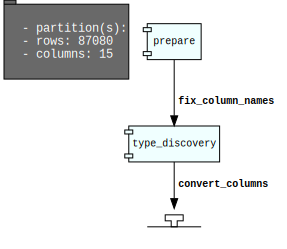

In [7]:
df.visualize_transforms()

In [8]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import gzip
import pickle
import logging
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ads.dataset.factory import DatasetFactory
from ads.automl.provider import OracleAutoMLProvider
from ads.automl.driver import AutoML
from ads.evaluations.evaluator import ADSEvaluator
plt.rcParams['figure.figsize'] = [10, 7]
plt.rcParams['font.size'] = 15
sns.set(color_codes=True)
sns.set(font_scale=1.5)
sns.set_palette("bright")
sns.set_style("whitegrid")

Create Predictive model

In [9]:
ml_engine = OracleAutoMLProvider(n_jobs=-1, loglevel=logging.ERROR)
oracle_automl = AutoML(wine_transformed, provider=ml_engine)
automl_model1, baseline = oracle_automl.train()

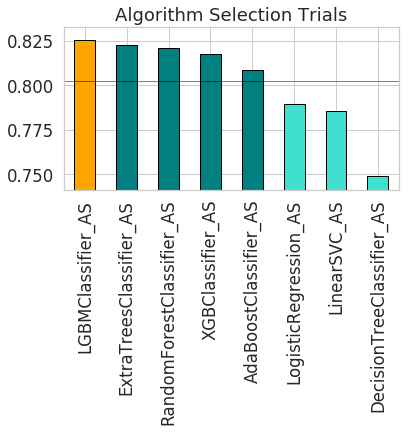

In [10]:
oracle_automl.visualize_algorithm_selection_trials()

In [12]:
test=DatasetFactory.open("Data/test_winedata.csv", target="pointsCat")
test.head()
test.get_recommendations()

Output()

In [13]:
test_wine=test.get_transformed_dataset()

HTML(value='<style  type="text/css" >\n    #T_ac955b9c_4e72_11ea_8c01_fb9e485f5626  {\n          text-align: r…

HTML(value='<style  type="text/css" >\n    #T_ac9f109c_4e72_11ea_8c01_fb9e485f5626  {\n          text-align: r…

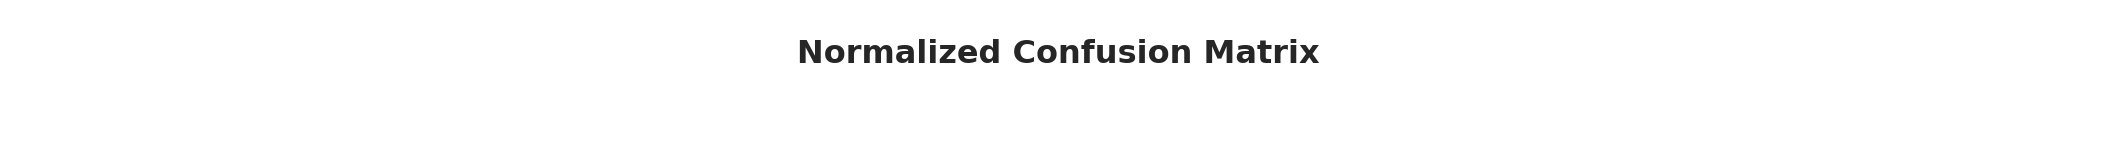

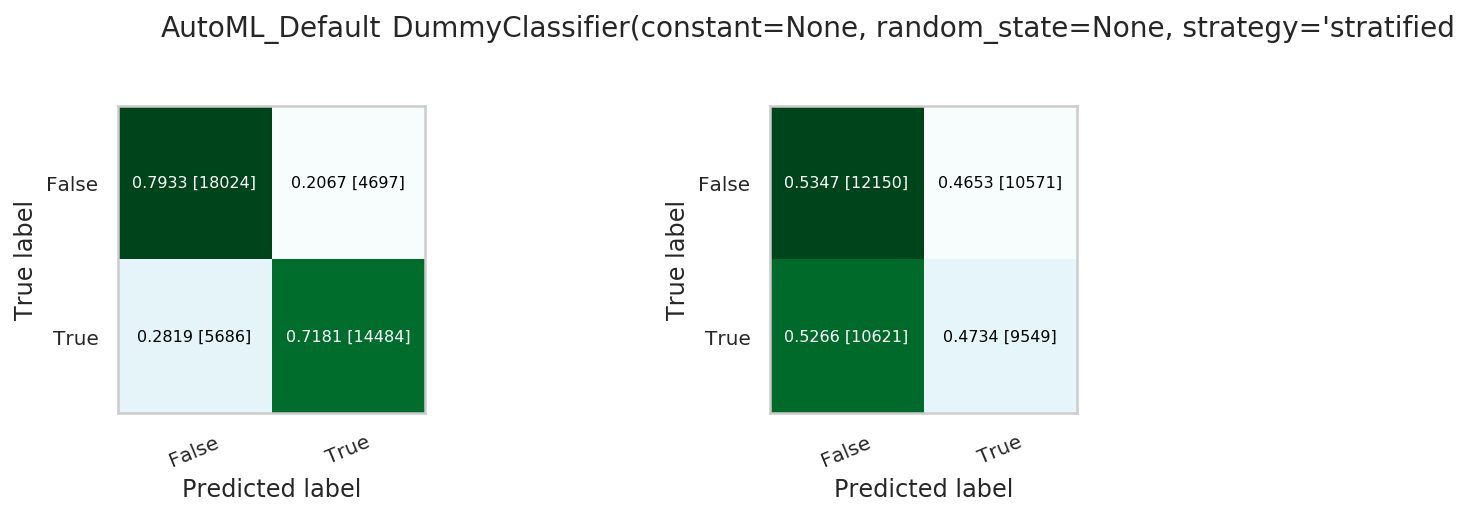

In [14]:
automl_model1.rename('AutoML_Default')
evaluator = ADSEvaluator(test_wine, models=[automl_model1, baseline],
                         training_data=wine_transformed, positive_class='Good')
evaluator.show_in_notebook(plots=['normalized_confusion_matrix'])
evaluator.metrics

  warnings.warn('Tight layout not applied. '



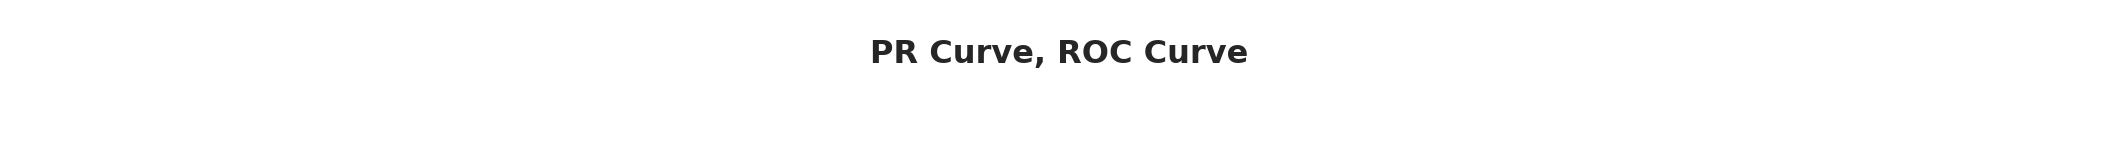

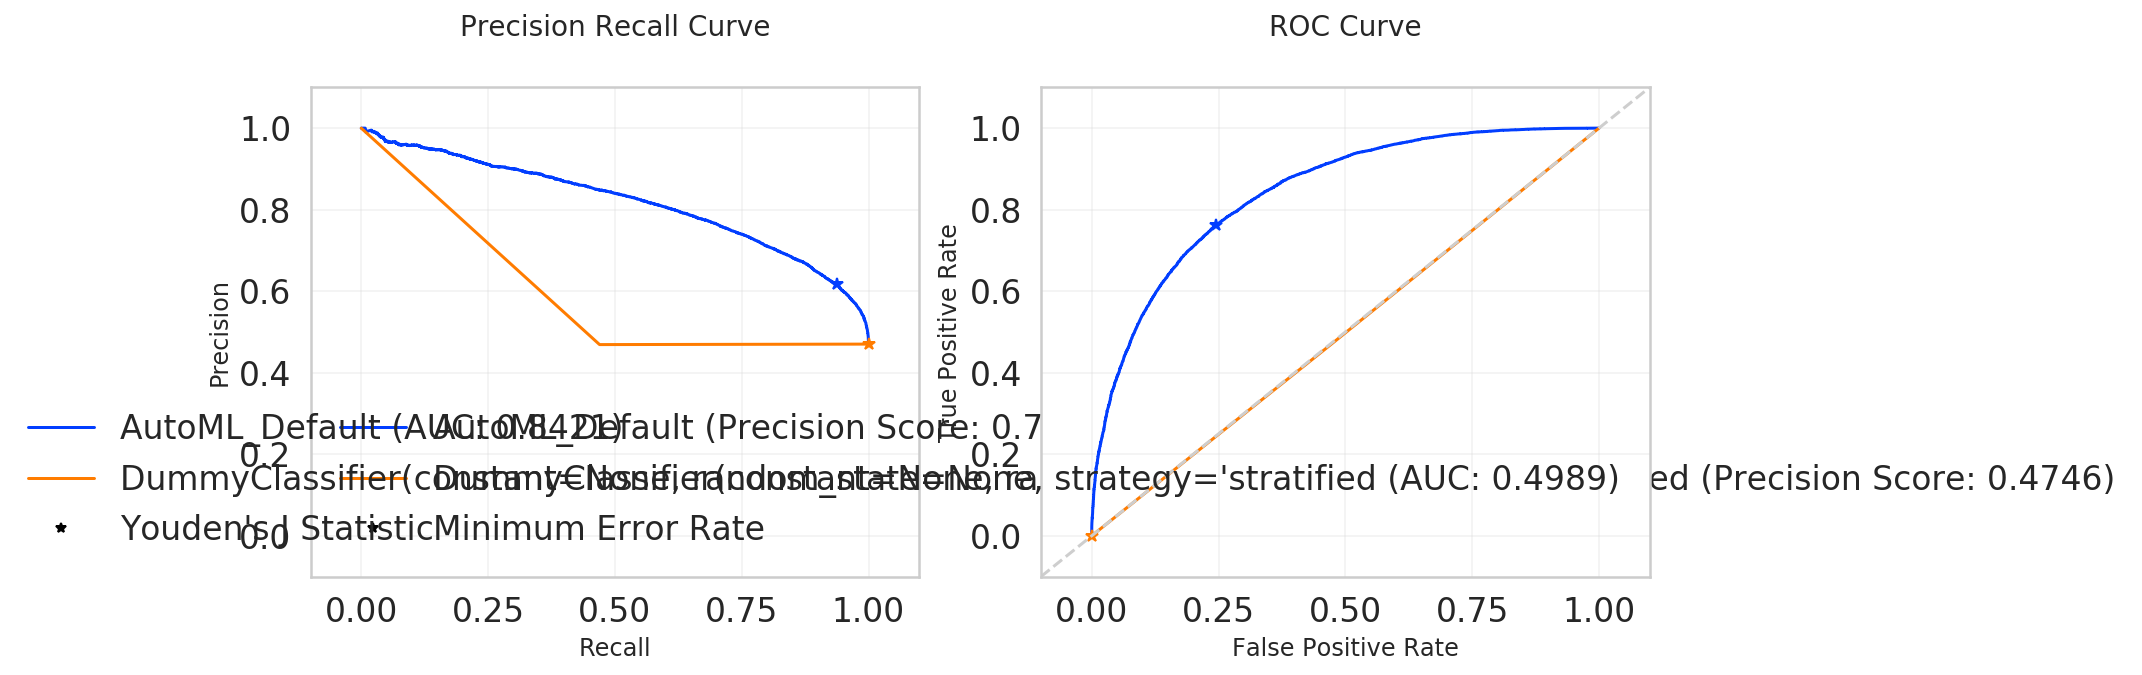

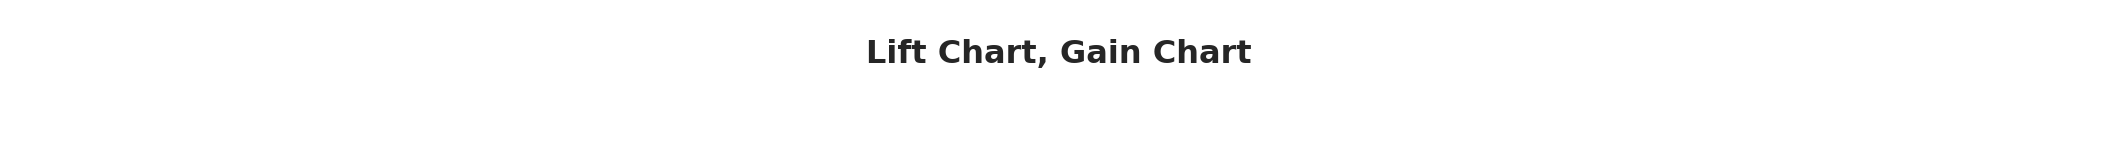

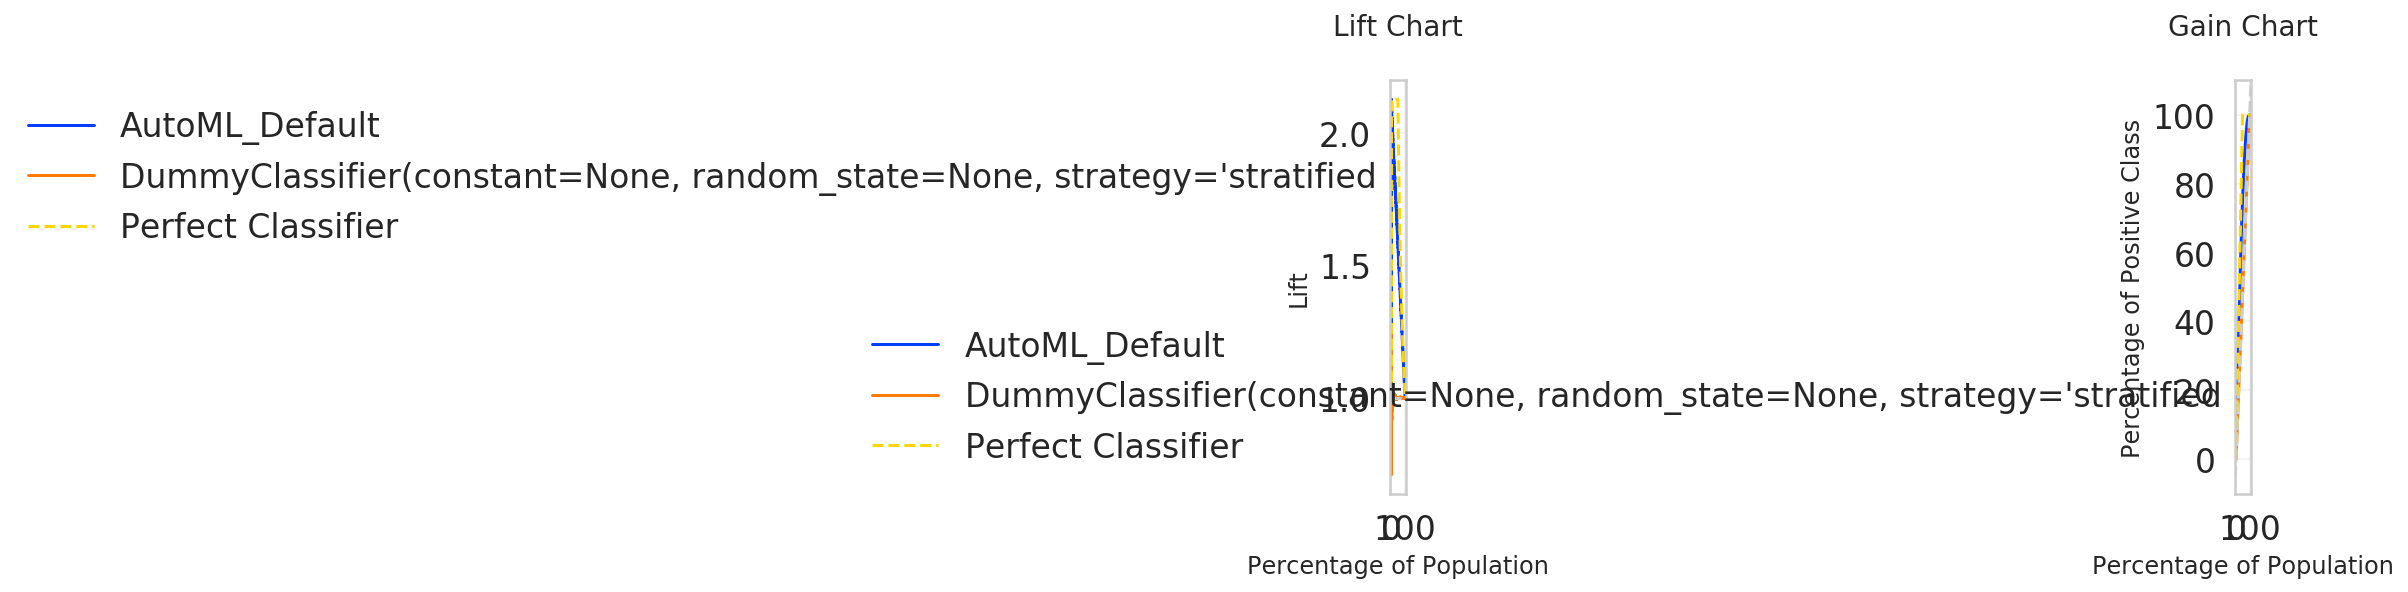

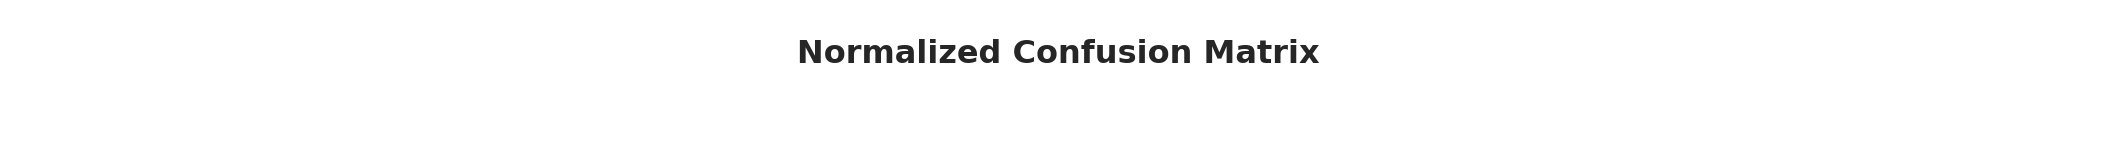

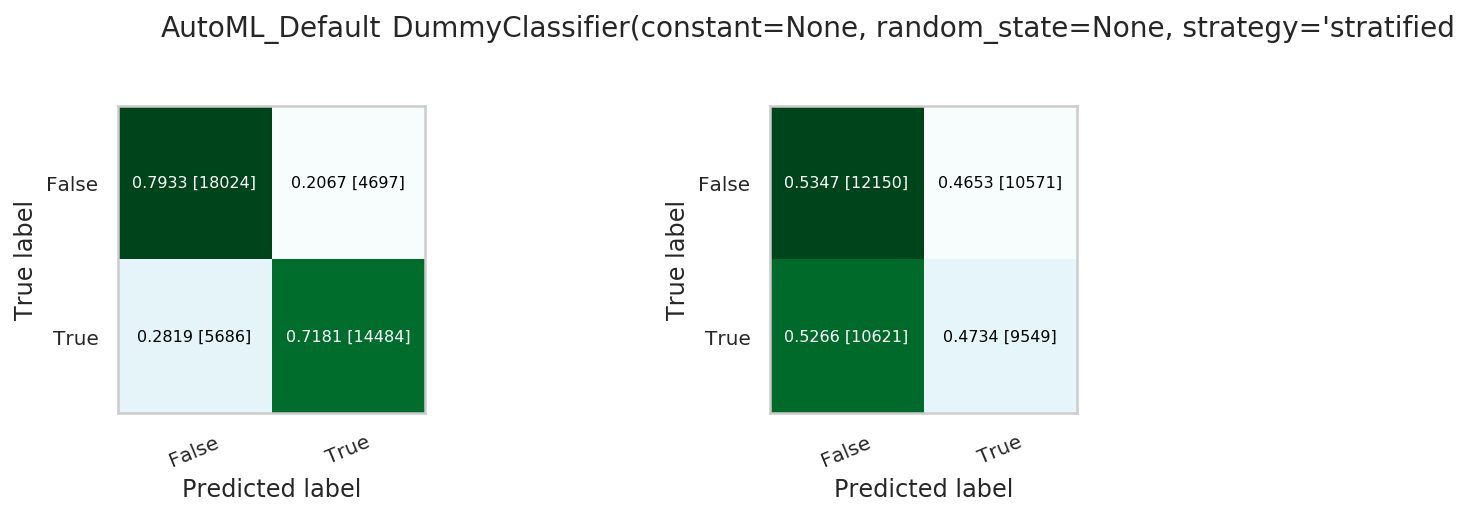

In [15]:
evaluator.show_in_notebook(perfect=True)

In [21]:
from ads.explanations.explainer import ADSExplainer
explainer = ADSExplainer(test_wine, automl_model1, training_data=wine_transformed)


ERROR:ads:ADS Exception
Traceback (most recent call last):
  File "/home/datascience/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3326, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-21-8e281ce1447a>", line 2, in <module>
    explainer = ADSExplainer(test_wine, automl_model1, training_data=wine_transformed)
  File "/home/datascience/conda/lib/python3.6/site-packages/ads/explanations/explainer.py", line 38, in __init__
    self.X_train, self.y_train = training_data.X, training_data.y
  File "/home/datascience/conda/lib/python3.6/site-packages/ads/dataset/dataset.py", line 794, in __getattr__
    attr = getattr(self.ddf, item)
  File "/home/datascience/conda/lib/python3.6/site-packages/dask/dataframe/core.py", line 3306, in __getattr__
    raise AttributeError("'DataFrame' object has no attribute %r" % key)
AttributeError: 'DataFrame' object has no attribute 'X'
AttributeError: 'DataFrame' object has no attribute 'X'

In [32]:
from ads.catalog.model import ModelSummaryList, ModelCatalog
from ads.catalog.project import ProjectSummaryList, ProjectCatalog
from ads.catalog.summary import SummaryList
from ads.common.model_artifact import ModelArtifact
path_to_model_artifact = "/home/datascience/block_storage/my_model"
model_artifact = automl_model1.prepare(path_to_model_artifact, force_overwrite=True)

Generated model artifact files under '/home/datascience/block_storage/my_model'. Please update the inference script (score.py) as required.


In [39]:
import os
compartment_id = os.environ['NB_SESSION_COMPARTMENT_OCID']
project_id = os.environ["PROJECT_OCID"]

# Saving the model artifact to the model catalog:
mc_model = model_artifact.save(project_id=project_id, compartment_id=compartment_id, display_name="Wine LGBMClassifier",
description="Wine LGBMClassifier predictor", training_script_path="~/block_storage/AutoML.ipynb", ignore_pending_changes=True)